# Introduction 

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
- Survived: Survival (0 = No, 1 = Yes)



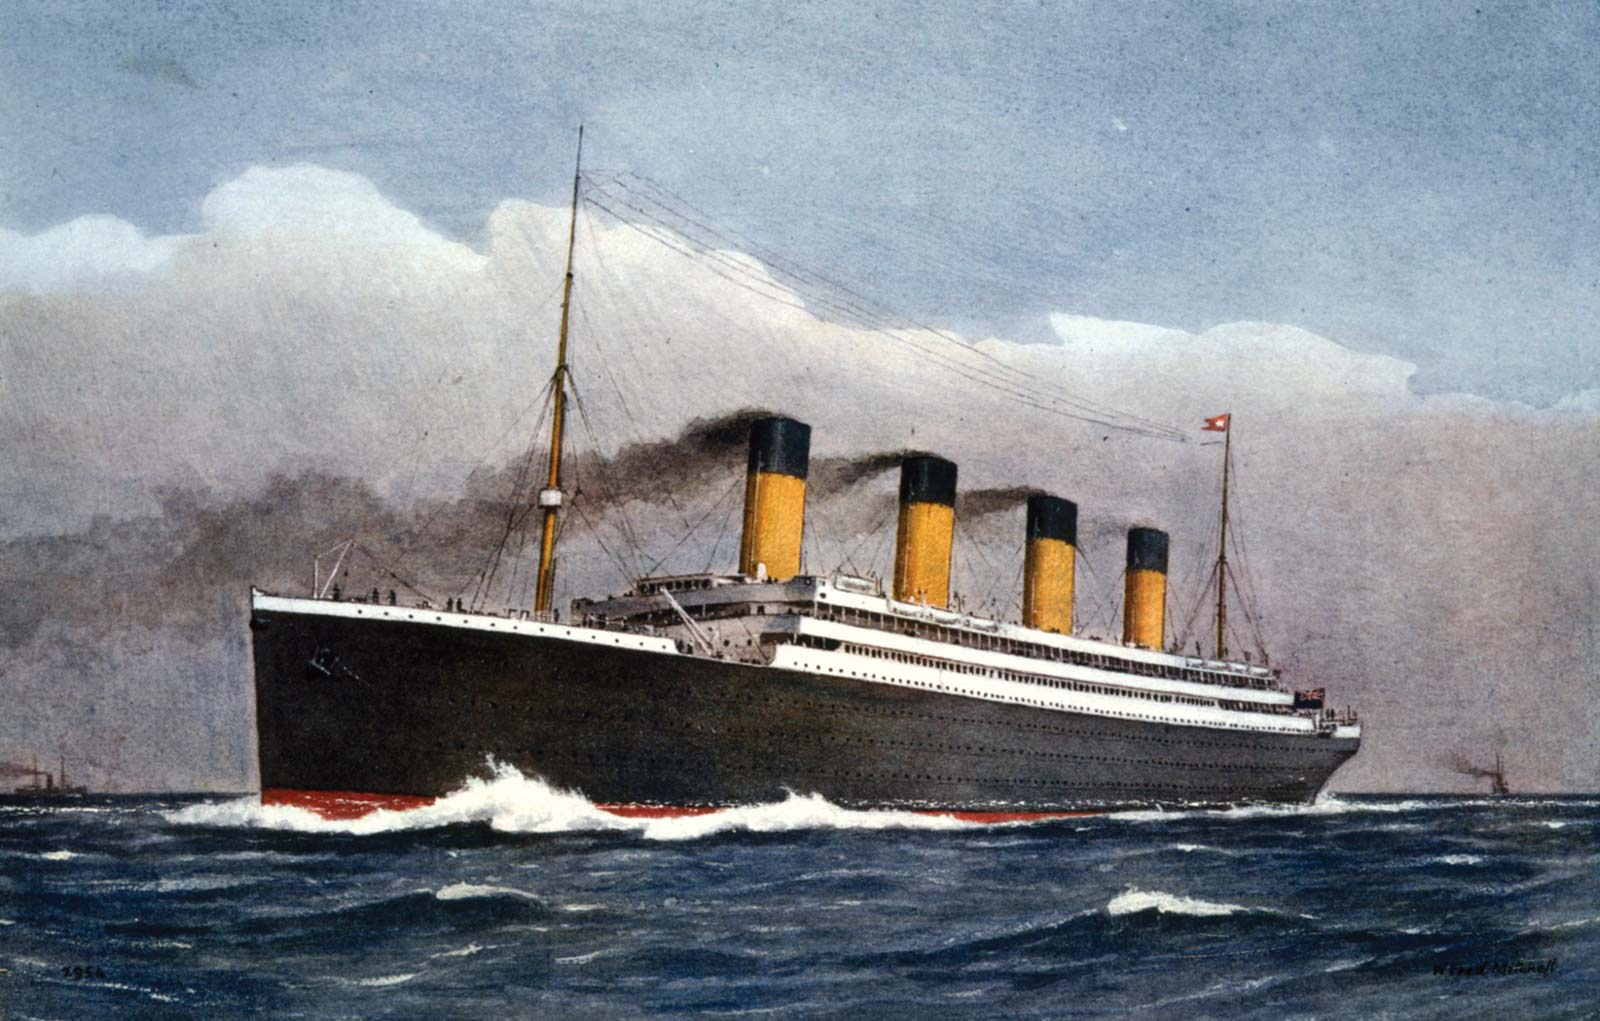

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://my_site.com/my_picture.jpg")

# Libraries Import

In [1]:
#import necessaary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#Load Dataset 

training_set = pd.read_csv("Train_Titanic.csv")

In [3]:
training_set.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explore Dataset 

In [5]:
print("Total passenger:",len(training_set))
survival = training_set[training_set['Survived'] == 1]
print("Number of passengers who survived =",len(survival))
print("Number of passenger who did not survived" , sum(training_set['Survived']==0))

Total passenger: 891
Number of passengers who survived = 342
Number of passenger who did not survived 549


In [6]:
print('% Survived =',round(len(survival)/len(training_set)*100,2))
print('% Did not survive=',round(sum(training_set['Survived']==0)/len(training_set)*100,2))

% Survived = 38.38
% Did not survive= 61.62


# Data Visualization

Text(0.5, 0, 'Ticket class')

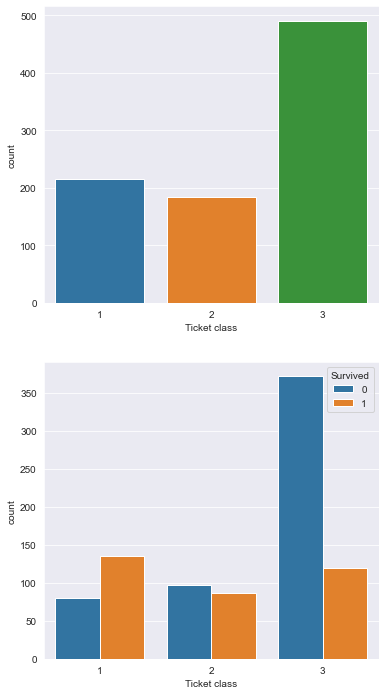

In [7]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Pclass',data=training_set);
plt.xlabel('Ticket class')
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived',data=training_set)
plt.xlabel('Ticket class')

Text(0.5, 0, 'Gender')

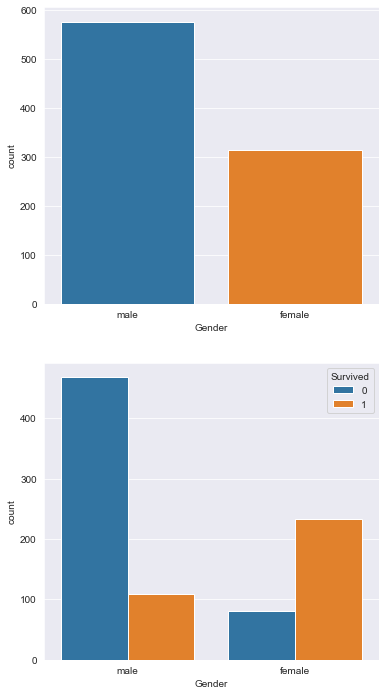

In [8]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Sex',data=training_set);
plt.xlabel('Gender')
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',data=training_set)
plt.xlabel('Gender')

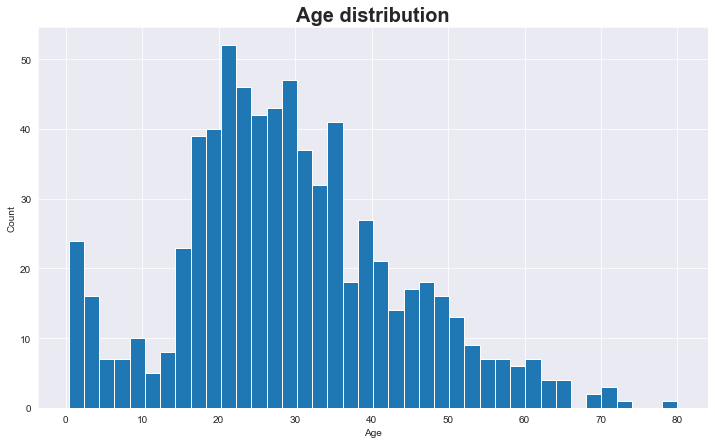

In [9]:
plt.figure(figsize=(12,7))
plt.title("Age distribution",fontsize=20, fontweight='bold')
training_set['Age'].hist(bins=40);
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10);

# Preparing Data for Training / Cleaning

Text(0.5, 1.0, 'Missing Value')

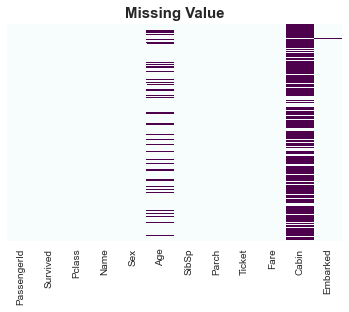

In [10]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='BuPu')
plt.title("Missing Value",fontsize=15,fontweight='bold')

In [11]:
training_set2 = training_set.copy()

In [12]:
training_set2.drop(['Name','Cabin','Embarked','Ticket','PassengerId'],axis=1,inplace=True)

In [13]:
training_set2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<AxesSubplot:xlabel='Sex', ylabel='Age'>

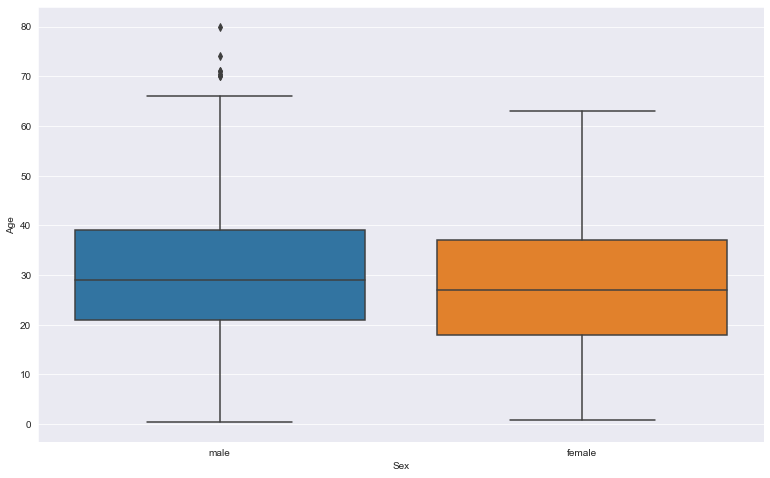

In [14]:
plt.figure(figsize=(13,8))
sns.boxplot(x='Sex', y='Age',data=training_set2)

In [15]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age

In [16]:
training_set2['Age'] = training_set2[['Age','Sex']].apply(Fill_Age,axis=1)

<AxesSubplot:>

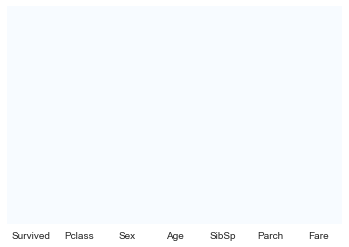

In [17]:
sns.heatmap(training_set2.isnull(), yticklabels = False, cbar = False, cmap="Blues")

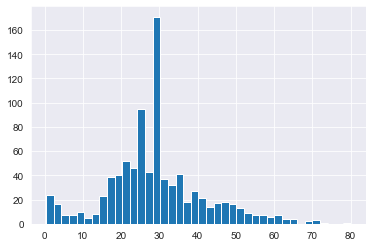

In [18]:
training_set2['Age'].hist(bins=40);

In [19]:
training_set2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [20]:
male=pd.get_dummies(training_set2['Sex'],drop_first=True)


In [21]:
training_set2.drop(['Sex'],axis=1,inplace=True)

In [22]:
training_set2 = pd.concat([training_set2, male], axis=1)

In [23]:
training_set2.rename(columns={"male": "Gender"},inplace=True)

In [24]:
training_set2

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# Model Training

In [25]:
X = training_set2.drop(['Survived'],axis=1).values
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [26]:
Y = training_set2['Survived'].values
Y


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# 80% Training, 20% Testing
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.2,random_state=10)

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)


LogisticRegression(random_state=0)

# Model Testing



In [30]:
y_predict = classifier.predict(X_test)
y_predict



array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

# Confusion Matrix

Text(34.0, 0.5, 'Prediction')

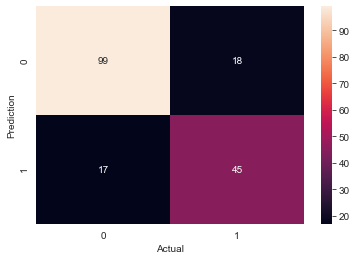

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Actual")
plt.ylabel("Prediction")

A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

Did not survive(0): Observation is positive.
<br>
Survive(1): Observation is not positive.
<br>
True Positive (TP): Outcome where the model correctly predicts the positive class.
<br>
True Negative (TN): Outcome where the model correctly predicts the negative class.
<br>
False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
<br>
False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



# Conclusion

We can learn a number of things about our model:
<br>
Our model predicted that 117/180 (1st + 2nd Quadrant/total) passengers did not survive when there were actually 116/180 (2nd+ 3rd Quadrant) did not survive. In conclusion, this model, we had achieved an accuracy of 144/180 or 80% (2nd + 4th Quadrant/total)
